# Understanding Pain in Knee OA 

In [1]:
# Check if modules/packages are available
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# What if they are missing?
# ... Anaconda, Install, Environments, Alternatives ... 

## Read Data

In [ ]:
# set working directory 
%cd "/Users/erikdam/Dropbox (DIKU)/DataScienceLab/MLIM2019/Thursday"

In [6]:
import numpy as np
import h5py 
f = h5py.File('PairedMarkers.mat','r') 
markers = np.array(f.get('markers'))
pain = np.array(f.get('pain'))
print(markers.shape)
print(pain.shape)

(79, 2, 4616)
(2, 4616)


array([[[3.0809736e-01, 3.4144926e-01, 3.4228805e-01, ...,
         3.2789168e-01, 3.5616398e-01, 3.4242591e-01],
        [3.2542470e-01, 3.2728571e-01, 3.3467570e-01, ...,
         3.3872384e-01, 3.5709774e-01, 3.2661211e-01]],

       [[1.6268915e+01, 2.5216452e+01, 1.7152956e+01, ...,
         1.8821058e+01, 1.9046577e+01, 2.1235502e+01],
        [1.8823889e+01, 2.6041908e+01, 1.6300777e+01, ...,
         2.0828621e+01, 1.9160843e+01, 1.8895550e+01]],

       [[1.7199313e+03, 2.0817822e+03, 1.3075573e+03, ...,
         1.6961118e+03, 1.6463330e+03, 2.1599397e+03],
        [2.3036938e+03, 2.0459600e+03, 1.3724093e+03, ...,
         1.7867374e+03, 1.8104639e+03, 1.9342133e+03]],

       ...,

       [[6.4792686e+00, 6.5132079e+00, 5.4105511e+00, ...,
         7.3522625e+00, 7.7846746e+00, 8.3040953e+00],
        [4.0680866e+00, 6.5631633e+00, 5.9987478e+00, ...,
         7.6236787e+00, 7.3525229e+00, 8.7923174e+00]],

       [[4.8000002e+00, 2.4230001e+00, 2.8859999e+00, ...,
        

In [8]:
markerTags = []
for column in f['markerTags']:
    row_data = []
    for row_number in range(len(column)):            
        row_data.append(''.join(map(chr, f[column[row_number]][:])))   
    markerTags.append(row_data[0])
print(markerTags)

['Tibia-Homogeneity', 'Tibia-IntStd', 'mTC-Volume', 'mTC-Area', 'mTC-Thickness', 'mTC-ThickQ10', 'mTC-ThicknessCentral', 'mTC-Cavity', 'mTC-CavityRel', 'mTC-Homogeneity', 'mTC-IntStd', 'mTC-Contact Area', 'mTC-Congruity', 'mTC-Smoothness', 'lTC-Volume', 'lTC-Area', 'lTC-Thickness', 'lTC-ThickQ10', 'lTC-ThicknessCentral', 'lTC-Cavity', 'lTC-CavityRel', 'lTC-Homogeneity', 'lTC-IntStd', 'lTC-Contact Area', 'lTC-Congruity', 'lTC-Smoothness', 'mFC-Volume', 'mFC-Area', 'mFC-Thickness', 'mFC-ThickQ10', 'mFC-ThicknessAnterior', 'mFC-ThicknessCentral', 'mFC-ThicknessPosterior', 'mFC-Cavity', 'mFC-CavityRel', 'mFC-Homogeneity', 'mFC-IntStd', 'mFC-Smoothness', 'lFC-Volume', 'lFC-Area', 'lFC-Thickness', 'lFC-ThickQ10', 'lFC-ThicknessAnterior', 'lFC-ThicknessCentral', 'lFC-ThicknessPosterior', 'lFC-Cavity', 'lFC-CavityRel', 'lFC-Homogeneity', 'lFC-IntStd', 'lFC-Smoothness', 'PC-Volume', 'PC-Area', 'PC-Thickness', 'PC-ThickQ10', 'PC-Cavity', 'PC-CavityRel', 'PC-Homogeneity', 'PC-IntStd', 'PC-Smoothn

In [7]:
# Separate MRI markers from the Xray markers
mri = markers[:-2,:,:]
mriTags = markerTags[:-2]
xray = markers[-2:,:,:]
xrayTags = markerTags[-2:]
print(xrayTags)

['JSW', 'KL']


In [9]:
# Clean up NaN pain and NaN vars
nanPain = np.max(np.isnan(pain), axis=0)
nanXray = np.max(np.max(np.isnan(xray), axis=0), axis=0)
nanMRI = np.max(np.max(np.isnan(mri), axis=0), axis=0)
print('From a total of %d knees, found %d nan pain, %d nan mri, %d nan xray' % (markers.shape[2], np.sum(nanPain), np.sum(nanMRI), np.sum(nanXray)))

From a total of 4616 knees, found 3 nan pain, 0 nan mri, 1970 nan xray


# Inspecting the data

In [ ]:
%whos

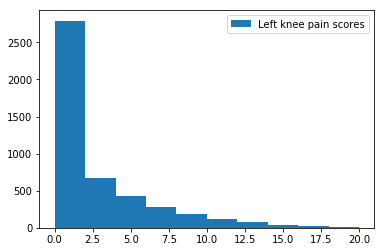

In [11]:
import matplotlib.pyplot as plt
plt.hist(pain[0,:])
plt.legend(["Left knee pain scores"]);

# Define a subset for the analysis

Let's look at right knees for those with mri measures and pain score

In [14]:
ok = ~nanMRI & ~nanPain
print(type(ok))
print(ok.shape)
print(ok[0])

<class 'numpy.ndarray'>
(4616,)
True


array([ True,  True,  True, ...,  True,  True,  True])

In [17]:
inVars = mri[:,1,ok].T
outcome = pain[1,ok]
outBin = outcome > 0
print(inVars.shape)
print(outcome.shape)
outcome

(4613, 77)
(4613,)


array([1., 0., 3., ..., 0., 0., 1.], dtype=float32)

In [ ]:
plt.hist(np.mean(inVars, axis=0));

# Linear Discriminant Analysis: Pain or No Pain?

In [18]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

model = LinearDiscriminantAnalysis()
model.fit(inVars, outBin)
pred = model.predict(inVars)

print('Data has %d with pain, %d with no pain' % (np.sum(outBin), np.sum(~outBin)))
print('Prediction has %d with pain, %d with no pain' % (np.sum(pred), np.sum(~pred)))

Data has 2724 with pain, 1889 with no pain
Prediction has 3267 with pain, 1346 with no pain


In [20]:
import sklearn.metrics as skm

def evaluate(labels, pred, classNames):
    print('Accuracy:    %.3f' % (skm.accuracy_score(labels,pred)))
    print(skm.classification_report(labels, pred, target_names=classNames))

In [21]:
evaluate(outBin, pred, ['Right Pain', 'Right Pain-free'])

Accuracy:    0.640
                 precision    recall  f1-score   support

     Right Pain       0.58      0.42      0.49      1889
Right Pain-free       0.66      0.79      0.72      2724

      micro avg       0.64      0.64      0.64      4613
      macro avg       0.62      0.61      0.60      4613
   weighted avg       0.63      0.64      0.63      4613



# Multi-Linear Regression: What correlates with Pain?

Linear regression coefficient: 0.14


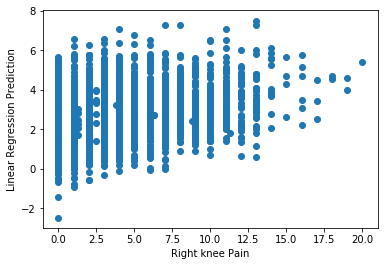

In [22]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

model = LinearRegression()
model.fit(inVars, outcome)
pred = model.predict(inVars)

plt.scatter(outcome, pred)
plt.xlabel('Right knee Pain')
plt.ylabel('Linear Regression Prediction')
print('Linear regression coefficient: %.2f' % (model.score(inVars, outcome)))

In [23]:
def evalCorrelation(xvals, yvals, xlab, ylab):
    r2 = skm.r2_score(xvals, yvals)
    mad = np.mean(np.abs(xvals-yvals))
    print('Linear regression coefficient R2: %.2f' % (r2));
    print('Mean absolute difference (MAD): %.2f' % (mad));    
    plt.scatter(xvals, yvals)
    plt.xlabel(xlab)
    plt.ylabel(ylab);
    return r2, mad

Linear regression coefficient R2: 0.14
Mean absolute difference (MAD): 2.28


(0.1357160864164999, 2.281151)

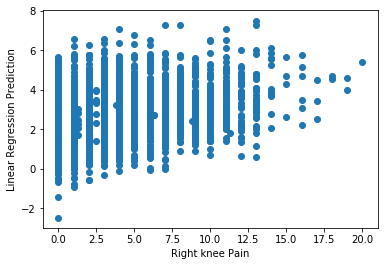

In [24]:
evalCorrelation(outcome, pred, 'Right knee Pain', 'Linear Regression Prediction')

### Intra-subject Normalization

Exercise: Make the Linear Regression analysis where both the input variables and the outcome is the difference between left and right knee. 

(array([3.000e+00, 1.000e+00, 3.000e+00, 6.000e+00, 6.000e+00, 1.400e+01,
        2.400e+01, 7.000e+01, 6.800e+01, 8.000e+01, 8.900e+01, 1.310e+02,
        1.660e+02, 2.390e+02, 3.430e+02, 2.224e+03, 3.570e+02, 2.320e+02,
        1.700e+02, 1.270e+02, 8.400e+01, 5.500e+01, 7.400e+01, 1.400e+01,
        1.900e+01, 7.000e+00, 4.000e+00, 0.000e+00, 2.000e+00, 1.000e+00]),
 array([-17.       , -15.866667 , -14.733334 , -13.6      , -12.466666 ,
        -11.333333 , -10.2      ,  -9.066667 ,  -7.9333334,  -6.8      ,
         -5.6666665,  -4.5333333,  -3.4      ,  -2.2666667,  -1.1333333,
          0.       ,   1.1333333,   2.2666667,   3.4      ,   4.5333333,
          5.6666665,   6.8      ,   7.9333334,   9.066667 ,  10.2      ,
         11.333333 ,  12.466666 ,  13.6      ,  14.733334 ,  15.866667 ,
         17.       ], dtype=float32),
 <a list of 30 Patch objects>)

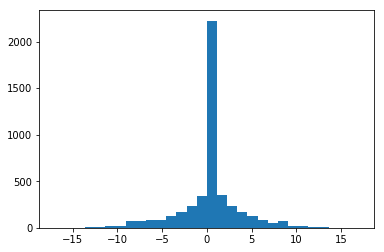

In [95]:
inVars = mri[:,1,ok].T-mri[:,0,ok].T
outcome = pain[1,ok]-pain[0,ok]
outBin = outcome > 0
# print(outBin)
plt.hist(outcome, bins= 30)

In [ ]:
print(pain)
outcome = pain[0,ok]
model = LinearRegression()
model.fit(inVars, outcome)
pred = model.predict(inVars)

plt.scatter(outcome, pred)
plt.xlabel('left knee Pain')
plt.ylabel('Linear Regression Prediction')
print('Linear regression coefficient: %.2f' % (model.score(inVars, outcome)))

# Non-Linear Regression: Random Forest

D:\sofatware\anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Linear regression coefficient R2: 0.81
Mean absolute difference (MAD): 0.97


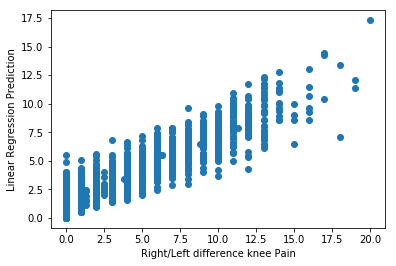

In [35]:
from sklearn.ensemble import RandomForestRegressor

inVars = mri[:,1,ok].T
outcome = pain[1,ok]
outBin = outcome > 0
model = RandomForestRegressor()
model.fit(inVars, outcome)
pred = model.predict(inVars)
evalCorrelation(outcome, pred, 'Right/Left difference knee Pain', 'Linear Regression Prediction');

### Cross-validation!

Linear regression coefficient R2: 0.08
Mean absolute difference (MAD): 2.37


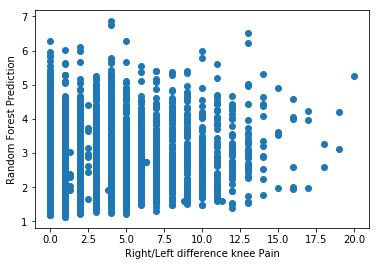

In [50]:
from sklearn.model_selection import cross_val_predict

model = RandomForestRegressor(n_estimators=100, max_features='sqrt', max_depth=10) # with default features
pred = cross_val_predict(model, inVars, outcome, cv=10)
evalCorrelation(outcome, pred, 'Right/Left difference knee Pain', 'Random Forest Prediction');

Exercise: Try a simpler RF model, use more RF trees, and more CV folds to train more robustly and possibly avoid over-fitting

Linear regression coefficient R2: 0.09
Mean absolute difference (MAD): 2.36


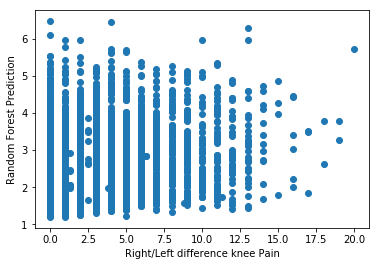

In [51]:
model = RandomForestRegressor(n_estimators=500, max_features='sqrt', max_depth=10) # with default features
pred = cross_val_predict(model, inVars, outcome, cv=10)
evalCorrelation(outcome, pred, 'Right/Left difference knee Pain', 'CV Random Forest Prediction');

How about the simpler linear regression model above - is it overfitting?

Linear regression coefficient R2: 0.08
Mean absolute difference (MAD): 2.35


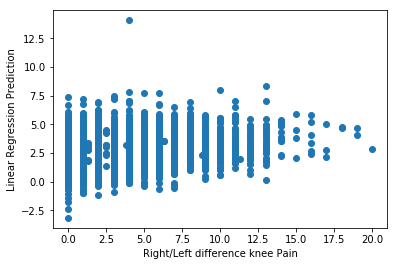

In [40]:
model = LinearRegression()
pred = cross_val_predict(model, inVars, outcome, cv=3)
evalCorrelation(outcome, pred, 'Right/Left difference knee Pain', 'Linear Regression Prediction');

# K-Nearest Neighbors?!

Linear regression coefficient R2: 0.00
Mean absolute difference (MAD): 2.38


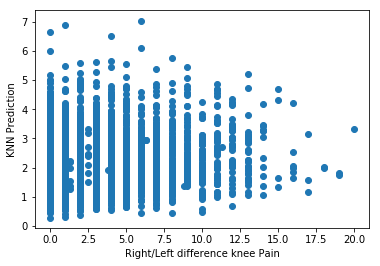

In [42]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors=20, weights='distance')
pred = cross_val_predict(model, inVars, outcome, cv=3)
evalCorrelation(outcome, pred, 'Right/Left difference knee Pain', 'KNN Prediction');

## Neural Network?! 

Linear regression coefficient R2: -10.41
Mean absolute difference (MAD): 4.82
5.585044860839844


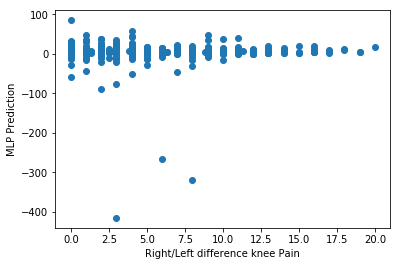

In [47]:
import time 
start=time.time()

from sklearn.neural_network import MLPRegressor
model = MLPRegressor(max_iter=1000)
pred = cross_val_predict(model, inVars, outcome, cv=3)
evalCorrelation(outcome, pred, 'Right/Left difference knee Pain', 'MLP Prediction');

done = time.time()
print(done - start)

# Standard Trick: Dimensionality Reduction

Let's try PCA dimensionality reduction prior to classification.

In [55]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.999, svd_solver='full')
modeVars = pca.fit_transform(inVars)
print(inVars.shape)
print(modeVars.shape)

(4613, 77)
(4613, 19)


Linear regression coefficient R2: 0.07
Mean absolute difference (MAD): 2.38


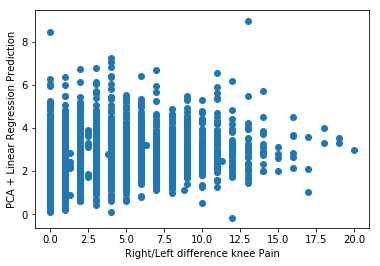

In [56]:
model = LinearRegression()
pred = cross_val_predict(model, modeVars, outcome, cv=5)
evalCorrelation(outcome, pred, 'Right/Left difference knee Pain', 'PCA + Linear Regression Prediction');

Linear regression coefficient R2: 0.05
Mean absolute difference (MAD): 2.44


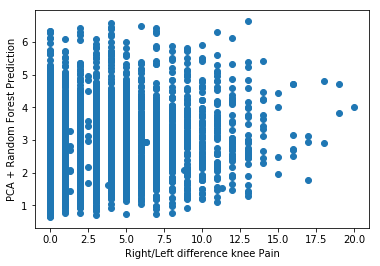

In [57]:
model = RandomForestRegressor(n_estimators=100, max_features=5)
pred = cross_val_predict(model, modeVars, outcome, cv=5)
evalCorrelation(outcome, pred, 'Right/Left difference knee Pain', 'PCA + Random Forest Prediction');

# Standard Trick: Feature Scaling

kNN relies on the Euclidean distance in the feature space for finding nearest neighbors. This means that features with very large range may overshadow all other features. Or, features with very small range are overlooked. To avoid this, feature scaling can be effective.

Exercise: before using kNN (as above), scale each feature to have zero mean and standard deviation one (hint: ask Google)

In [81]:
from sklearn.preprocessing import scale
from sklearn.preprocessing import MinMaxScaler
#scalevar = scale(inVars, axis=0)
inVars



array([[3.2542470e-01, 1.8823889e+01, 2.3036938e+03, ..., 3.8660756e-01,
        3.1230907e+01, 4.0680866e+00],
       [3.2728571e-01, 2.6041908e+01, 2.0459600e+03, ..., 3.6501023e-01,
        3.6650623e+01, 6.5631633e+00],
       [3.3467570e-01, 1.6300777e+01, 1.3724093e+03, ..., 3.5321549e-01,
        1.8740372e+01, 5.9987478e+00],
       ...,
       [3.3872384e-01, 2.0828621e+01, 1.7867374e+03, ..., 3.4698901e-01,
        2.3277527e+01, 7.6236787e+00],
       [3.5709774e-01, 1.9160843e+01, 1.8104639e+03, ..., 3.4326681e-01,
        1.7419970e+01, 7.3525229e+00],
       [3.2661211e-01, 1.8895550e+01, 1.9342133e+03, ..., 3.6054981e-01,
        2.4564741e+01, 8.7923174e+00]], dtype=float32)

In [103]:
scalevar = MinMaxScaler().fit(inVars)
plt.hist(np.std(scalevar, axis=0))

IndexError: tuple index out of range

In [ ]:
model = RandomForestRegressor(n_estimators=100, max_features=5)
pred = cross_val_predict(model, scalevar, outcome, cv=5)
evalCorrelation(outcome, pred, 'Right/Left difference knee Pain', 'PCA + Random Forest Prediction');

# Standard Trick: Feature Selection

In [91]:
from sklearn.feature_selection import SelectKBest, f_regression

inFew = SelectKBest(f_regression, k=10).fit_transform(inVars, outcome)
inFew.shape

(4613, 10)

In [ ]:
model = RandomForestRegressor(n_estimators=100, max_features='sqrt') # with default features
pred = cross_val_predict(model, inFew, outcome, cv=3)
evalCorrelation(outcome, pred, 'Right/Left difference knee Pain', 'KBest + Random Forest Prediction');

Actually, Random Forest is already doing feature selection within the algorithm.

Exercise: kNN may benefit greatly from performing feature selection. Try the same selection with KNN

D:\sofatware\anaconda\lib\site-packages\sklearn\preprocessing\data.py:176: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
D:\sofatware\anaconda\lib\site-packages\sklearn\preprocessing\data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


Linear regression coefficient R2: 0.08
Mean absolute difference (MAD): 2.20


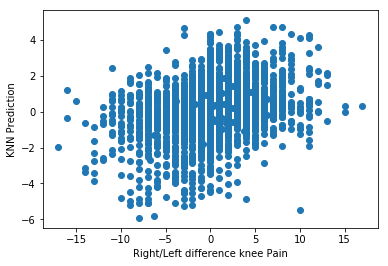

In [96]:
from sklearn.neighbors import KNeighborsRegressor
scaleinv = scale(inVars)
inFew = SelectKBest(f_regression, k=10).fit_transform(scaleinv, outcome)
model = KNeighborsRegressor(n_neighbors=20, weights='distance')
pred = cross_val_predict(model, inFew, outcome, cv=5)
evalCorrelation(outcome, pred, 'Right/Left difference knee Pain', 'KNN Prediction');

# Summary